In [1]:

import csv 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score




In [2]:
sns.set('talk')

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
5,6,133,6.0,823.0,NaN,12,6650000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
9,10,133,6.0,1503.0,NaN,51,3000000


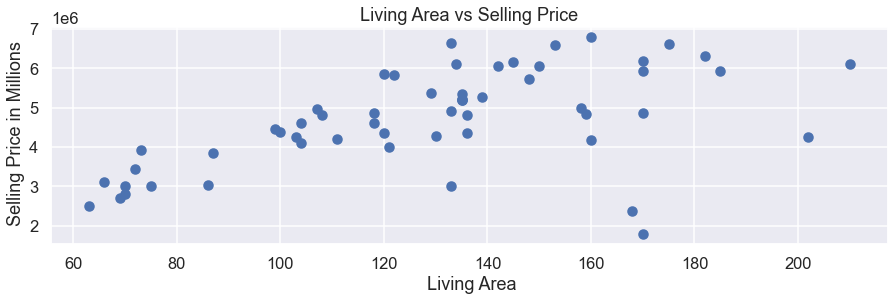

In [3]:

df=pd.read_csv('data_assignment2.csv')

fig,ax = plt.subplots(1, 1, figsize=(15, 4))


ax.scatter(df['Living_area'],df['Selling_price'])
ax.set_title(" Living Area vs Selling Price ")
ax.set_ylabel(" Selling Price in Millions")
ax.set_xlabel(" Living Area")
df

Int64Index([19, 24, 40, 45, 49, 50, 55], dtype='int64') Int64Index([9], dtype='int64')


Text(0.5, 0, ' Living Area')

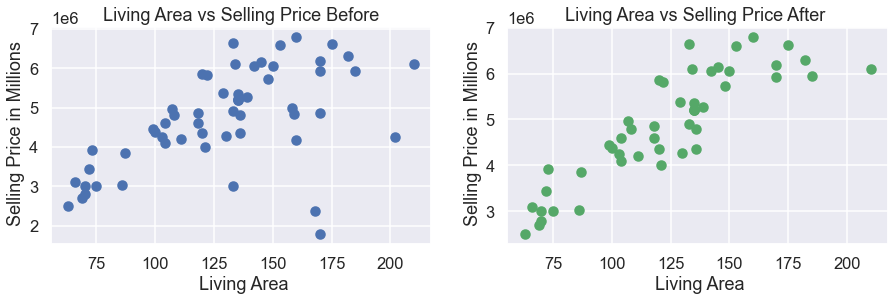

In [4]:
fig,ax2 = plt.subplots(1, 2, figsize=(15, 4))
ax2[0].scatter(df['Living_area'],df['Selling_price'])
ax2[0].set_title(" Living Area vs Selling Price Before ")
ax2[0].set_ylabel(" Selling Price in Millions")
ax2[0].set_xlabel(" Living Area")

indexNames = df[(df['Living_area'] >= 155) & (df['Selling_price'] <= 5000000)].index
indexNames2 = df[(df['Living_area'] <= 150) & (df['Living_area'] >= 100) &(df['Selling_price'] <= 3100000)].index
#indexNames3 = df[(df['Living_area'] >= 200) &(df['Selling_price'] >= 6000000)].index

print(indexNames,indexNames2)

df.drop(indexNames , inplace=True)
df.drop(indexNames2 , inplace=True)
#df.drop(indexNames3 , inplace=True)

ax2[1].scatter(df['Living_area'],df['Selling_price'],color='g')
ax2[1].set_title(" Living Area vs Selling Price After  ")
ax2[1].set_ylabel(" Selling Price in Millions")
ax2[1].set_xlabel(" Living Area")

In [5]:
X_train,X_test,y_train,y_test= train_test_split(df['Living_area'],df['Selling_price'])

Text(0.5, 1.0, 'Train Test Split')

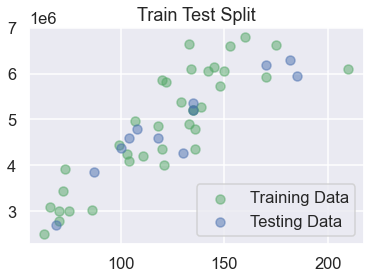

In [6]:
plt.scatter(X_train,y_train,label='Training Data',color='g',alpha=0.5)
plt.scatter(X_test,y_test,label='Testing Data',color='b',alpha=0.5)
plt.legend()
plt.title("Train Test Split")

In [7]:
# Linear Model Creation
reg = linear_model.LinearRegression()
reg.fit(X_train.values.reshape(-1,1),y_train.values)

LinearRegression()

Text(0.5, 1.0, ' Regression on the Validation set ')

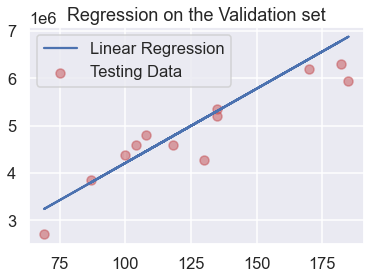

In [8]:
# Training on the test data
prediction = reg.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label="Linear Regression",color='b')
plt.scatter(X_test,y_test,label='Testing Data',color='r',alpha=0.5)
plt.legend()

plt.title(" Regression on the Validation set ")

In [9]:
reg.score(X_test.values.reshape(-1,1),y_test.values)

0.7900090403529487

[ 60.          64.31818182  68.63636364  72.95454545  77.27272727
  81.59090909  85.90909091  90.22727273  94.54545455  98.86363636
 103.18181818 107.5        111.81818182 116.13636364 120.45454545
 124.77272727 129.09090909 133.40909091 137.72727273 142.04545455
 146.36363636 150.68181818 155.         159.31818182 163.63636364
 167.95454545 172.27272727 176.59090909 180.90909091 185.22727273
 189.54545455 193.86363636 198.18181818 202.5        206.81818182
 211.13636364 215.45454545 219.77272727 224.09090909 228.40909091
 232.72727273 237.04545455 241.36363636 245.68181818 250.        ]


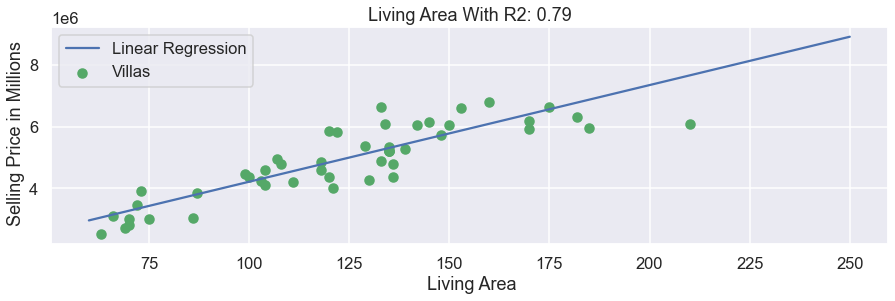

In [10]:
areas=np.linspace(60,250,45)
areas.tolist()
print(areas)
predictions2=[]

for i in range (len(areas)):
    predictions2.append(reg.predict([[areas[i]]]))
fig,ax3 = plt.subplots(1, 1, figsize=(15, 4))


ax3.scatter(df['Living_area'],df['Selling_price'],color='g', label = 'Villas')
ax3.set_title(" Living Area vs Selling Price ")
ax3.set_xlabel(" Living Area")
ax3.set_ylabel(" Selling Price in Millions")
ax3.plot(areas,predictions2,color='b', label = 'Linear Regression')
ax3.set_title('Living Area With R2: ' + str(np.round(r2_score(y_test, prediction),2)))
ax3.legend()

<AxesSubplot:xlabel='Living_area', ylabel='Selling_price'>

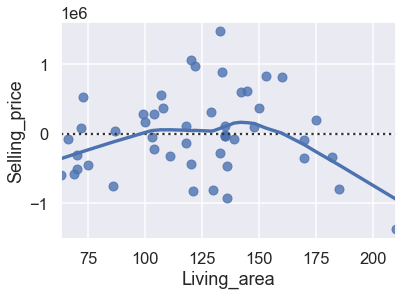

In [11]:
sns.residplot(x=df['Living_area'], y=df['Selling_price'],lowess=True)


In [12]:
print("The slope is equal to", reg.coef_.tolist())

The slope is equal to [31389.543194898328]


In [13]:
print("The intercept is equal to", reg.intercept_.tolist())

The intercept is equal to 1071317.3066849615


In [14]:
a=[100,150,200]
b=np.zeros(3)
b[0]=reg.predict([[100]])
b[1]=reg.predict([[150]])
b[2]=reg.predict([[200]])

dataFrameG=np.vstack(( a,b))
Test=np.transpose(dataFrameG)
columns = ['Living Area','Predicted Price']
dg = pd.DataFrame(data=Test,columns=columns)

dg.style.format("{:.4}")

,Living Area,Predicted Price
0,100.0,4.21e+06
1,150.0,5.78e+06
2,200.0,7.349e+06


# Part 2

In [15]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier


In [16]:
iris = load_iris()
X = iris.data
Y = iris.target
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3,random_state=0)

In [18]:
logReg = LogisticRegression()
logReg.fit(X_train, Y_train);

In [19]:
predictions = logReg.predict(X_test)

In [20]:
pred_labels=[]
for i in range(len(predictions)):
    if predictions[i]==0:
        pred_labels.append("setosa")
    elif predictions[i]==1:
        pred_labels.append("versicolor")
    else:
        pred_labels.append("virginica") 

In [21]:
y_test_labels=[]
for i in range(len(Y_test)):
    if Y_test[i]==0:
        y_test_labels.append("setosa")
    elif Y_test[i]==1:
        y_test_labels.append("versicolor")
    else:
        y_test_labels.append("virginica") 

In [22]:
print("Accuracy:Logistic Regression",metrics.accuracy_score(Y_test, predictions))

Accuracy:Logistic Regression 0.9777777777777777


In [23]:
cm = metrics.confusion_matrix(y_test_labels, pred_labels)
labels=["setosa","versicolor","virginica"]

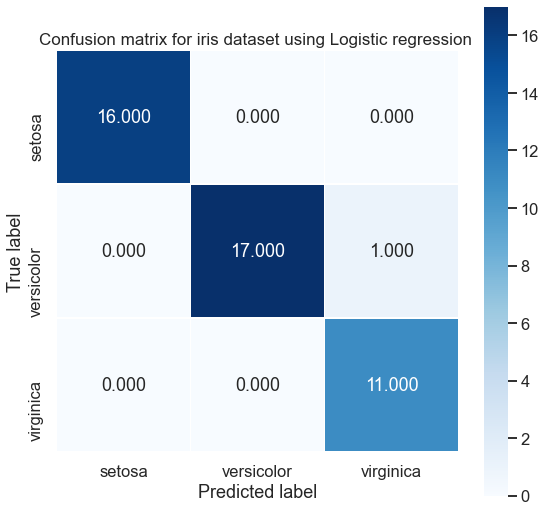

In [24]:
fig = plt.figure(figsize=(9,9)) 
ax = fig.add_subplot(111) 
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('True label');
plt.xlabel('Predicted label');

ax.set_xticklabels(labels) 
ax.set_yticklabels(labels) 
plt.title("Confusion matrix for iris dataset using Logistic regression ", size = 17);
plt.show()

In [25]:
#Create KNN Classifier, we will create 3 classifier for K=1,50 and 100 points and uniform/distance based weights
knn = KNeighborsClassifier(n_neighbors=1,weights='distance') #k=1
#Train the model using the training sets
knn.fit(X_train, Y_train)

knnuni = KNeighborsClassifier(n_neighbors=1,weights='uniform') #k=1
knnuni.fit(X_train, Y_train)

#K=50
knn2 = KNeighborsClassifier(n_neighbors=50,weights='distance') #k=50
knn2.fit(X_train, Y_train)

knnuni2 = KNeighborsClassifier(n_neighbors=50,weights='uniform')#k=50
knnuni2.fit(X_train, Y_train)

#K=100
knn3 = KNeighborsClassifier(n_neighbors=100,weights='distance') #k=10
knn3.fit(X_train, Y_train)

knnuni3 = KNeighborsClassifier(n_neighbors=100,weights='uniform') #k=10
knnuni3.fit(X_train, Y_train);

In [26]:
#Predict the response for test dataset
y_pred_dis = knn.predict(X_test)
y_pred_uni = knnuni.predict(X_test)

y_pred_dis2 = knn2.predict(X_test)
y_pred_uni2 = knnuni2.predict(X_test)

y_pred_dis3 = knn3.predict(X_test)
y_pred_uni3 = knnuni3.predict(X_test)


In [27]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:K=1,Distance based weights",metrics.accuracy_score(Y_test, y_pred_dis))
print("Accuracy:K=1,Uniform based weights",metrics.accuracy_score(Y_test, y_pred_uni))

print("Accuracy:K=50,Distance based weights",metrics.accuracy_score(Y_test, y_pred_dis2))
print("Accuracy:K=50,Uniform based weights",metrics.accuracy_score(Y_test, y_pred_uni2))

print("Accuracy:K=100,Distance based weights",metrics.accuracy_score(Y_test, y_pred_dis3))
print("Accuracy:K=100,Uniform based weights",metrics.accuracy_score(Y_test, y_pred_uni3))

Accuracy:K=1,Distance based weights 0.9777777777777777
Accuracy:K=1,Uniform based weights 0.9777777777777777
Accuracy:K=50,Distance based weights 0.9777777777777777
Accuracy:K=50,Uniform based weights 0.9111111111111111
Accuracy:K=100,Distance based weights 0.9777777777777777
Accuracy:K=100,Uniform based weights 0.6


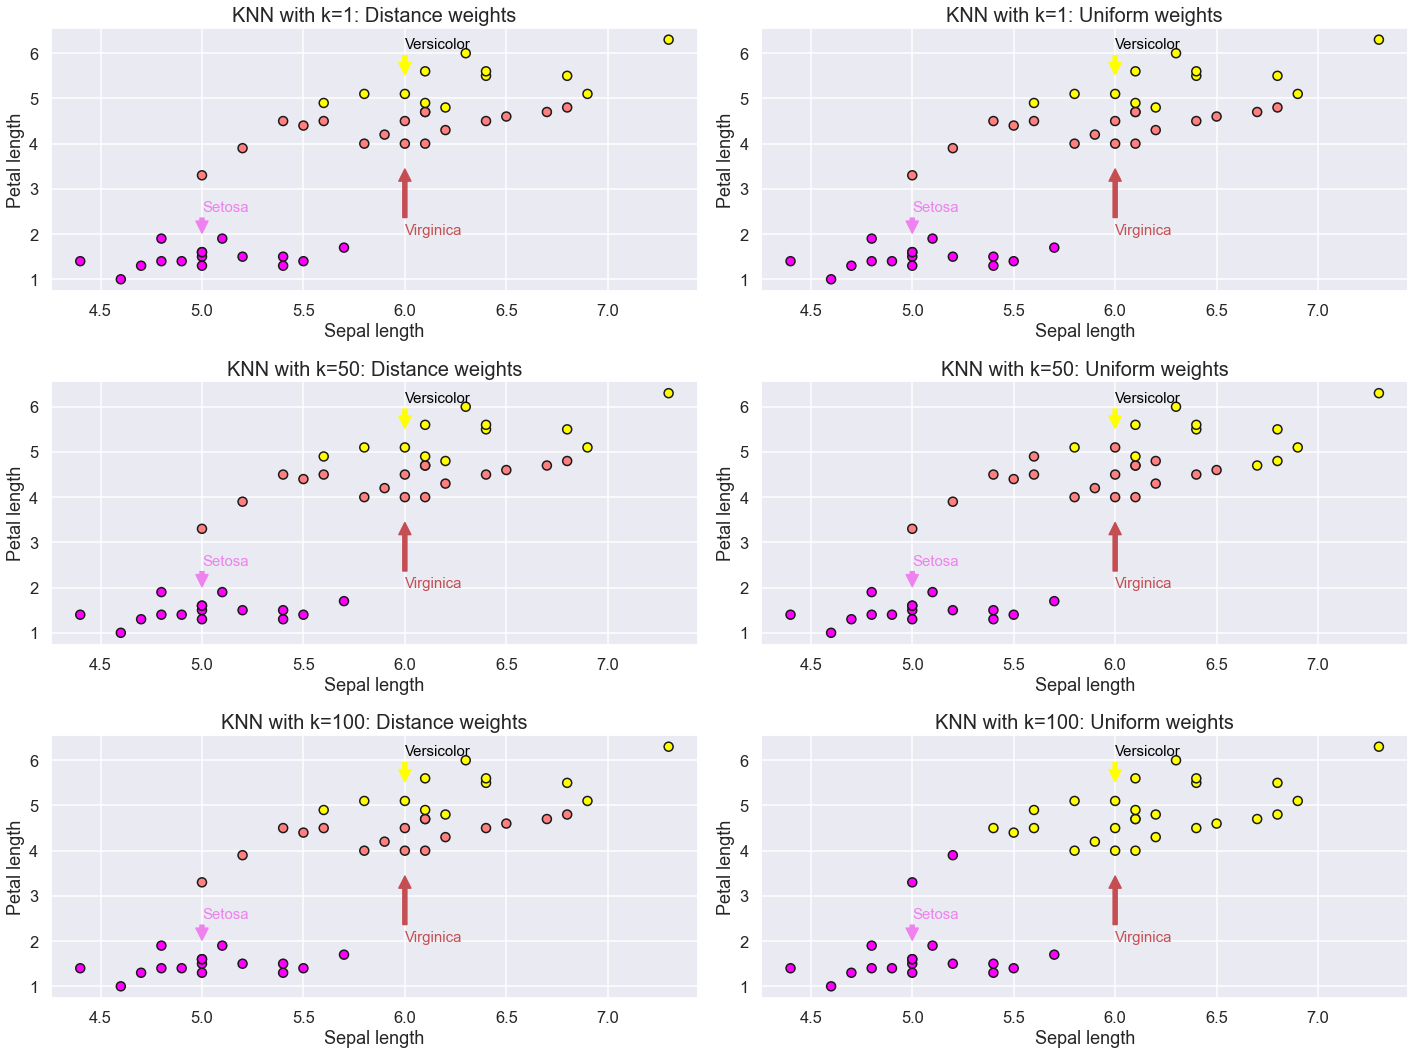

In [28]:
# Plot the predicted points for different k and uniform/distance based weights

fig,axs  = plt.subplots(3,2,figsize=(20,15))
(ax0,ax1),(ax2, ax3),(ax4, ax5)= axs

ax0.scatter(X_test[:, 0], X_test[:, 2], c=y_pred_dis,cmap='spring',
            edgecolor='k')
ax0.set_xlabel('Sepal length');
ax0.set_ylabel('Petal length');
ax0.annotate("Setosa",(5, 2),xytext=(5,2.5),fontsize=15,color='violet',arrowprops=dict(color='violet',shrink=0.05));
ax0.annotate("Versicolor",(6, 5.5),xytext=(6,6.1),fontsize=15,color='black',arrowprops=dict(color='yellow',shrink=0.05));
ax0.annotate("Virginica",(6, 3.5),xytext=(6,2),fontsize=15,color='r',arrowprops=dict(color='r',shrink=0.05));
ax0.set_title('KNN with k=1: Distance weights',fontsize=20)

ax1.scatter(X_test[:, 0], X_test[:, 2], c=y_pred_uni,cmap='spring',
            edgecolor='k')
ax1.set_xlabel('Sepal length');
ax1.set_ylabel('Petal length');
ax1.annotate("Setosa",(5, 2),xytext=(5,2.5),fontsize=15,color='violet',arrowprops=dict(color='violet',shrink=0.05));
ax1.annotate("Versicolor",(6, 5.5),xytext=(6,6.1),fontsize=15,color='black',arrowprops=dict(color='yellow',shrink=0.05));
ax1.annotate("Virginica",(6, 3.5),xytext=(6,2),fontsize=15,color='r',arrowprops=dict(color='r',shrink=0.05));
ax1.set_title('KNN with k=1: Uniform weights',fontsize=20)


ax2.scatter(X_test[:, 0], X_test[:, 2], c=y_pred_dis2,cmap='spring',
            edgecolor='k')
ax2.set_xlabel('Sepal length');
ax2.set_ylabel('Petal length');
ax2.annotate("Setosa",(5, 2),xytext=(5,2.5),fontsize=15,color='violet',arrowprops=dict(color='violet',shrink=0.05));
ax2.annotate("Versicolor",(6, 5.5),xytext=(6,6.1),fontsize=15,color='black',arrowprops=dict(color='yellow',shrink=0.05));
ax2.annotate("Virginica",(6, 3.5),xytext=(6,2),fontsize=15,color='r',arrowprops=dict(color='r',shrink=0.05));
ax2.set_title('KNN with k=50: Distance weights',fontsize=20)


ax3.scatter(X_test[:, 0], X_test[:, 2], c=y_pred_uni2,cmap='spring',
            edgecolor='k')
ax3.set_xlabel('Sepal length');
ax3.set_ylabel('Petal length');
ax3.annotate("Setosa",(5, 2),xytext=(5,2.5),fontsize=15,color='violet',arrowprops=dict(color='violet',shrink=0.05));
ax3.annotate("Versicolor",(6, 5.5),xytext=(6,6.1),fontsize=15,color='black',arrowprops=dict(color='yellow',shrink=0.05));
ax3.annotate("Virginica",(6, 3.5),xytext=(6,2),fontsize=15,color='r',arrowprops=dict(color='r',shrink=0.05));
ax3.set_title('KNN with k=50: Uniform weights',fontsize=20)


ax4.scatter(X_test[:, 0], X_test[:, 2], c=y_pred_dis3,cmap='spring',
            edgecolor='k')
ax4.set_xlabel('Sepal length');
ax4.set_ylabel('Petal length');
ax4.annotate("Setosa",(5, 2),xytext=(5,2.5),fontsize=15,color='violet',arrowprops=dict(color='violet',shrink=0.05));
ax4.annotate("Versicolor",(6, 5.5),xytext=(6,6.1),fontsize=15,color='black',arrowprops=dict(color='yellow',shrink=0.05));
ax4.annotate("Virginica",(6, 3.5),xytext=(6,2),fontsize=15,color='r',arrowprops=dict(color='r',shrink=0.05));
ax4.set_title('KNN with k=100: Distance weights',fontsize=20)

ax5.scatter(X_test[:, 0], X_test[:, 2], c=y_pred_uni3,cmap='spring',
            edgecolor='k')
ax5.set_xlabel('Sepal length');
ax5.set_ylabel('Petal length');
ax5.annotate("Setosa",(5, 2),xytext=(5,2.5),fontsize=15,color='violet',arrowprops=dict(color='violet',shrink=0.05));
ax5.annotate("Versicolor",(6, 5.5),xytext=(6,6.1),fontsize=15,color='black',arrowprops=dict(color='yellow',shrink=0.05));
ax5.annotate("Virginica",(6, 3.5),xytext=(6,2),fontsize=15,color='r',arrowprops=dict(color='r',shrink=0.05));
ax5.set_title('KNN with k=100: Uniform weights',fontsize=20);

fig.tight_layout()

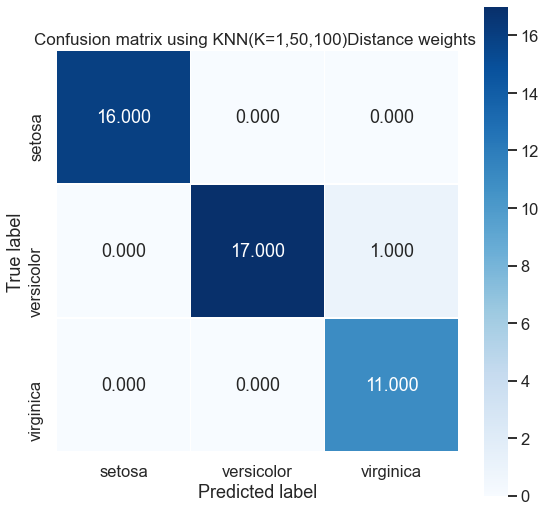

In [29]:
cm = metrics.confusion_matrix(Y_test, y_pred_dis)
labels=["setosa","versicolor","virginica"]
fig = plt.figure(figsize=(9,9)) 
ax = fig.add_subplot(111) 
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('True label');
plt.xlabel('Predicted label');

ax.set_xticklabels(labels) 
ax.set_yticklabels(labels) 
plt.title("Confusion matrix using KNN(K=1,50,100)Distance weights ", size = 17);
plt.show()

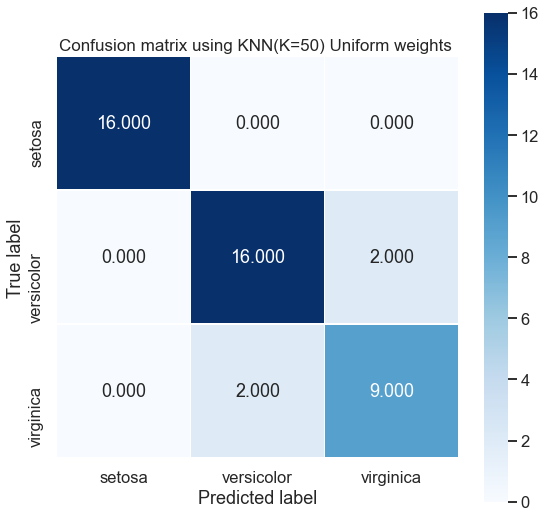

In [30]:
cm = metrics.confusion_matrix(Y_test, y_pred_uni2)
labels=["setosa","versicolor","virginica"]
fig = plt.figure(figsize=(9,9)) 
ax = fig.add_subplot(111) 
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('True label');
plt.xlabel('Predicted label');

ax.set_xticklabels(labels) 
ax.set_yticklabels(labels) 
plt.title("Confusion matrix using KNN(K=50) Uniform weights ", size = 17);
plt.show()

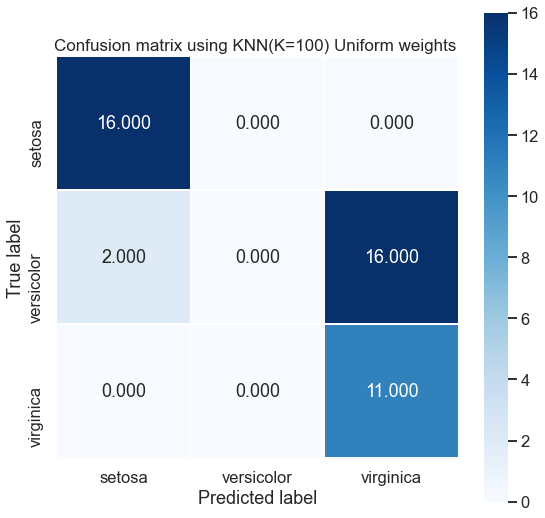

In [31]:
cm = metrics.confusion_matrix(Y_test, y_pred_uni3)
labels=["setosa","versicolor","virginica"]
fig = plt.figure(figsize=(9,9)) 
ax = fig.add_subplot(111) 
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('True label');
plt.xlabel('Predicted label');

ax.set_xticklabels(labels) 
ax.set_yticklabels(labels) 
plt.title("Confusion matrix using KNN(K=100) Uniform weights ", size = 17);
plt.show()